<a href="https://colab.research.google.com/github/MegRoy97/GlassClassification/blob/master/GlassClassificationRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset = pd.read_csv("glass.csv")

In [0]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Check the first 5 rows of the dataset by using dataset.head()

In [0]:
print(dataset['Type'].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


As we can see, type 3,5,6,7 glass are less in number compared to 1 and 2 types in the given dataset which may lead to classifier bias.

In [0]:
datavis = dataset.copy()
datavis = datavis.drop('Type', axis = 1)
columnName = list(datavis.columns)
labels = dataset['Type']
newlabel = []
for i in labels:
  if 1<=i<=3:
    newlabel.append('1')
  else:
    newlabel.append('0')
labels = pd.DataFrame(newlabel, columns = ["Type"])
labels["Type"].value_counts()

1    163
0     51
Name: Type, dtype: int64

To remove some degree of classifier bias, we consider glass types 1 to 3 as type 1 and 5 to 7 as type 0

In [0]:
dataset.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

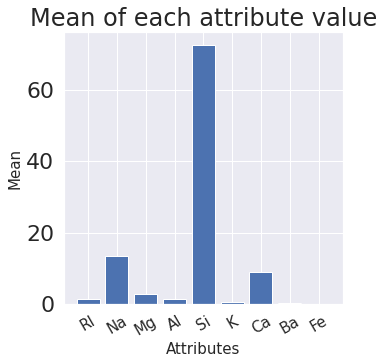

In [0]:
import matplotlib.pyplot as plt
def visualizeData(datavis):
  index = datavis.shape[1]
  # datavis.head()
  index = np.arange(index)
  attr = datavis.columns
  plt.figure(figsize=(5,5))
  plt.bar(index, datavis.mean())
  plt.xlabel('Attributes', fontsize=15)
  plt.ylabel('Mean', fontsize=15)
  plt.xticks(index, attr, fontsize=15, rotation=30)
  plt.title('Mean of each attribute value')
  plt.show()
visualizeData(datavis)

As it can be seen the mean value for 'Si' is significantly higher than the other attributes. This may lead to the classifier being trained incorrectly. Hence, we require normalization of the attributes to avoid giving undue importance to any particular attribute.

In [0]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
normalize.fit(datavis)
# normalize.data_max_
normdata = pd.DataFrame(normalize.transform(datavis), columns = columnName)
normdata.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


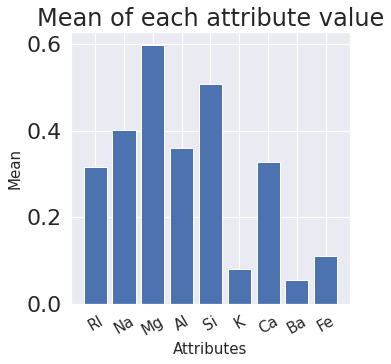

In [0]:
visualizeData(normdata)

As we can see now, the data is not as skewed as before


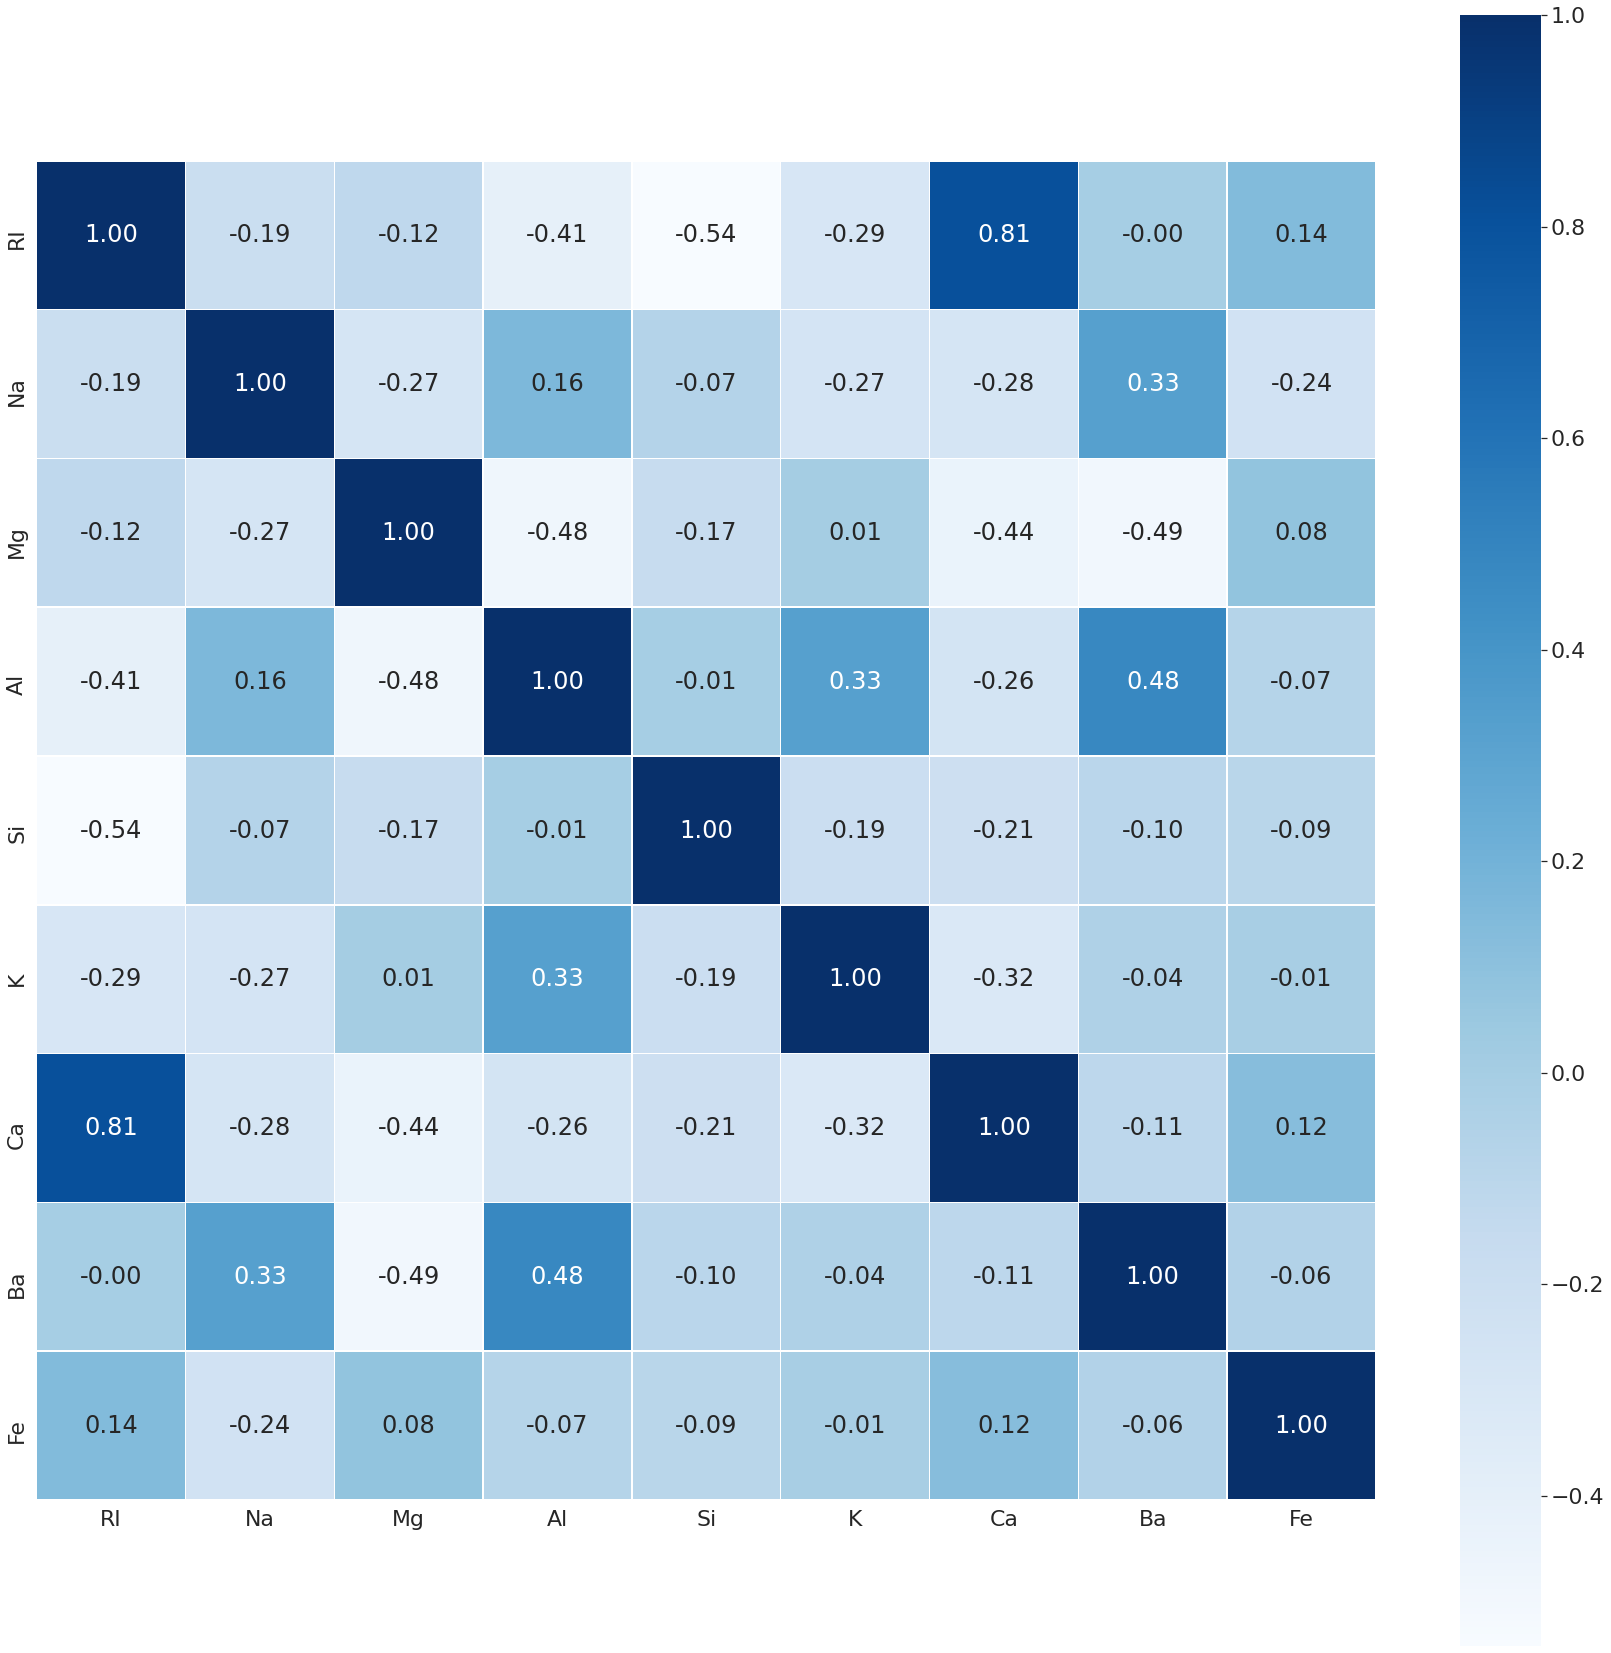

In [0]:
import seaborn as sns

def corrHeatMap(datavis):
    cor = datavis.corr()
    sns.set(font_scale=2)  
    figure, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(cor, cmap = "Blues", fmt='.2f',
                square=True, linewidths=.5, annot=True)
    plt.show();
corrHeatMap(normdata)

Here we can see, the correlation between attributes 'Ca' and 'RI' is high. We need to remove this correlation to avoid classifier bias 

In [0]:
from sklearn.decomposition import PCA
X = normdata[['RI', 'Ca']]
pca = PCA(n_components=2)
xdata = pca.fit_transform(X)
X = pd.DataFrame(xdata, columns = ['PCA1', 'PCA2'])
newdf = pd.concat([normdata, X], axis = 1)
newdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,PCA1,PCA2
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.068954,0.095355
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,-0.097261,0.051086
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,-0.145134,0.010216
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,-0.070197,0.026876
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,-0.087492,0.029368


In [0]:
newdf.drop(['RI','Ca'], axis=1)

,Na,Mg,Al,Si,K,Ba,Fe,PCA1,PCA2
0,0.437594,1.000000,0.252336,0.351786,0.009662,0.000000,0.0,0.068954,0.095355
1,0.475188,0.801782,0.333333,0.521429,0.077295,0.000000,0.0,-0.097261,0.051086
2,0.421053,0.790646,0.389408,0.567857,0.062802,0.000000,0.0,-0.145134,0.010216
3,0.372932,0.821826,0.311526,0.500000,0.091787,0.000000,0.0,-0.070197,0.026876
4,0.381955,0.806236,0.295950,0.583929,0.088567,0.000000,0.0,-0.087492,0.029368
...,...,...,...,...,...,...,...,...,...
209,0.512782,0.000000,0.806854,0.500000,0.012882,0.336508,0.0,-0.052022,-0.080689
210,0.630075,0.000000,0.529595,0.580357,0.000000,0.504762,0.0,-0.083691,-0.010030
211,0.545865,0.000000,0.538941,0.644643,0.000000,0.520635,0.0,0.037453,0.104706
212,0.548872,0.000000,0.514019,0.678571,0.000000,0.498413,0.0,-0.089065,-0.025815


In [0]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(newdf,labels,test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [0]:
rfc.fit(XTrain, yTrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
yPredrfc = rfc.predict(XTest)

In [0]:
from sklearn.metrics import accuracy_score
print("Accuracy:",(accuracy_score(yTest, yPredrfc))*100)

Accuracy: 93.02325581395348


AxesSubplot(0.125,0.125;0.62x0.755)


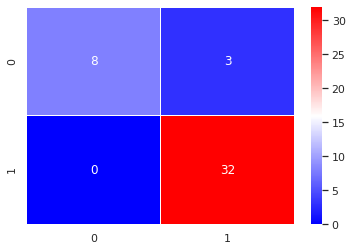

In [0]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1)
mat=confusion_matrix(yTest,yPredrfc)
print(sns.heatmap(mat,annot=True,cmap='bwr',linewidths=.5))